# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


use 500 random data to do the Machine Learning

In [11]:
df_test=df.sample(500)
df_test

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
5812,9.545194,5.331012,4.214182,0.030818,0.033339,0.035758,0.038189,0.040748,0.043549,0.046706,...,0.996015,0.998384,1.001001,1.003868,1.006988,1.010361,1.013991,1.017879,1.022027,1.026437
6777,9.432370,5.046692,4.385678,0.031002,0.033578,0.036044,0.038519,0.041122,0.043971,0.047185,...,1.002972,1.004174,1.005505,1.006973,1.008586,1.010351,1.012276,1.014369,1.016637,1.019087
7809,9.758658,5.269701,4.488957,0.030317,0.032747,0.035085,0.037438,0.039913,0.042620,0.045665,...,1.000023,1.000434,1.001038,1.001874,1.002977,1.004387,1.006141,1.008275,1.010829,1.013839
7167,9.562890,4.984243,4.578647,0.030842,0.033379,0.035811,0.038255,0.040827,0.043644,0.046822,...,1.004146,1.003839,1.003624,1.003523,1.003557,1.003745,1.004110,1.004671,1.005448,1.006464
1721,9.650359,5.650359,4.000000,0.030548,0.033014,0.035385,0.037772,0.040284,0.043031,0.046124,...,0.989225,0.993046,0.997236,1.001799,1.006741,1.012067,1.017782,1.023892,1.030400,1.037313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,9.676530,5.399556,4.276975,0.030850,0.033386,0.035817,0.038262,0.040834,0.043651,0.046829,...,0.994903,0.996726,0.998783,1.001075,1.003602,1.006366,1.009366,1.012603,1.016079,1.019793
1959,9.418616,5.002855,4.415760,0.030515,0.032969,0.035331,0.037709,0.040213,0.042953,0.046039,...,1.002441,1.003058,1.003823,1.004778,1.005967,1.007430,1.009210,1.011351,1.013893,1.016880
6064,9.745420,5.379795,4.365626,0.030329,0.032803,0.035173,0.037550,0.040045,0.042771,0.045836,...,0.995902,0.996860,0.998025,0.999444,1.001169,1.003248,1.005731,1.008668,1.012107,1.016100
4541,9.419857,5.015733,4.404124,0.030815,0.033325,0.035737,0.038165,0.040723,0.043525,0.046686,...,1.001062,1.002235,1.003580,1.005113,1.006847,1.008797,1.010979,1.013407,1.016096,1.019060


single output*(predict Num Cu)

In [31]:
from sklearn.model_selection import train_test_split
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
labels

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


array([5.33101222, 5.04669191, 5.26970141, 4.98424282, 5.65035908,
       5.43464435, 5.21883703, 5.20273527, 4.68699058, 4.75289482,
       4.98923776, 4.80284787, 4.        , 5.98609163, 5.20577362,
       4.06097159, 4.61954074, 5.13609126, 4.14185824, 5.52871418,
       6.        , 5.21117299, 4.        , 5.45580741, 4.70345514,
       5.58912171, 4.8589529 , 5.96343795, 4.63464197, 4.36540761,
       5.21259835, 5.56824947, 4.68522668, 4.85289477, 5.15525588,
       4.29166995, 5.73738917, 4.33498478, 5.13515025, 5.58629502,
       5.318484  , 4.22585232, 5.73461784, 5.13443397, 4.57834721,
       5.41848596, 5.02462231, 4.44097288, 6.38557507, 4.92604033,
       5.34577892, 5.02338572, 4.53154572, 5.44875149, 6.19410918,
       5.51483973, 4.51530296, 5.24925484, 4.25979368, 4.46596684,
       5.54655143, 4.77457736, 4.27448464, 4.959767  , 5.57271175,
       5.38170026, 5.1950723 , 4.77536325, 5.17969162, 5.34993514,
       4.69122203, 5.18911272, 5.70405928, 5.66362961, 4.93827

In [13]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [15]:
# Import the model we are using
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [16]:
gpr = model.fit(train_features, train_labels)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [18]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)

0.003302761824909699


In [22]:
print('R Squared Error from gpr score:',gpr.score(train_features, train_labels))

R Squared Error from gpr score: 0.9888327839158607


In [23]:
from sklearn.metrics import r2_score
print('R Squared Error:', r2_score(test_labels, pred_labels))

R Squared Error: 0.9890911246840579


predict only Num of Te

In [40]:
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
labels

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


array([4.21418186, 4.38567831, 4.48895695, 4.57864714, 4.        ,
       4.33220182, 4.55452291, 4.18143267, 4.47774187, 4.4522781 ,
       4.53330587, 4.59600457, 5.        , 4.22754405, 4.40229945,
       4.96951421, 4.80822712, 4.38460627, 4.77985757, 4.37802501,
       4.        , 4.46264565, 5.        , 4.40268359, 4.4907188 ,
       4.02232506, 4.32452189, 4.09006513, 4.58103222, 4.61158483,
       4.27841546, 4.28225636, 4.27486231, 4.10100261, 4.22017926,
       4.58732836, 4.19357947, 4.53278814, 4.13173364, 4.3285605 ,
       4.19328738, 4.92471589, 4.42827751, 4.19917997, 4.55182264,
       4.37776159, 4.35878767, 4.77003802, 4.        , 4.15465358,
       4.2132252 , 4.47817587, 4.65063745, 4.19522892, 4.10525847,
       4.34050872, 4.21215321, 4.26775875, 4.46165779, 4.76701658,
       4.27831232, 4.51566303, 4.23942299, 4.16533433, 4.29656793,
       4.08948258, 4.26835549, 4.48318995, 4.25891305, 4.38541302,
       4.60435566, 4.28025591, 4.04471569, 4.4454568 , 4.58176

In [42]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [43]:
gpr = model.fit(train_features, train_labels)

In [44]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)

0.00045932475141681304


In [45]:
from sklearn.metrics import r2_score
print('R Squared Error:', r2_score(test_labels, pred_labels))

R Squared Error: 0.9909071362859572


## From above, for individual prediction, by using spectra, the num of Te get higher R2

# use spectra predict Num of Cu, Te as multi target regression

In [33]:
# Multi target regression
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 100)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125, 2)


In [34]:
gpr = model.fit(train_features, train_labels)

In [36]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)

0.0025314003580414798


In [37]:
print('R Squared Error from gpr score for MTR:',gpr.score(train_features, train_labels))

R Squared Error from gpr score for MTR: 0.9861623213520035


/opt/miniconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [38]:
from sklearn.metrics import r2_score
print('R Squared Error:', r2_score(test_labels, pred_labels))

R Squared Error: 0.99064863475574


In [39]:
pred_labels

array([[4.99209526, 4.3599297 ],
       [5.74697924, 4.4353725 ],
       [4.34148324, 4.89444868],
       [4.51705017, 4.7566998 ],
       [5.2747812 , 4.08617602],
       [6.0917904 , 4.00067571],
       [4.70428703, 4.58643183],
       [4.68368721, 4.5015001 ],
       [5.17721283, 4.25239223],
       [4.82204718, 4.56120256],
       [4.64239531, 4.46042485],
       [4.99892278, 4.55503368],
       [4.74766754, 4.33574021],
       [5.60659629, 4.39271488],
       [5.99106829, 4.01757627],
       [5.15829085, 4.27834558],
       [5.45499822, 4.28689254],
       [5.22393409, 4.27673441],
       [4.65745038, 4.74596272],
       [5.64270494, 4.14126818],
       [4.92836772, 4.37835314],
       [5.09377586, 4.19452001],
       [6.5310612 , 4.01516578],
       [5.98599604, 4.21542172],
       [4.99190257, 4.49469661],
       [4.33627586, 4.03536354],
       [5.3669451 , 4.35644757],
       [5.754282  , 4.07850417],
       [5.00027251, 4.37968337],
       [5.63430745, 4.26992943],
       [5.

from the above, we can see that if we use multi target regression, the predicted values are still reasonable.
In the following, I am trying to use 1st and/or 2nd derivate to predict the number of atoms by multi target regression.

generate a derivate dataframe from the test dataframe.

In [121]:
import sys
sys.path.append('../PredictXANES')
import xanes_derivatives

In [61]:
dmu1, dmu2 = xanes_derivatives.xanes_derivatives(df_test)

In [67]:
# use first derivate only 
features=dmu1
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 99)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125, 2)


In [68]:
gpr = model.fit(train_features, train_labels)

In [69]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

0.0023952488907380363
R Squared Error: 0.9913572071168851


In [70]:
# use second derivate only 
features=dmu2
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 98)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125, 2)


In [71]:
gpr = model.fit(train_features, train_labels)

In [73]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

0.0034970737429013995
R Squared Error: 0.9869676720711851


# use first and second derivate together, multi target regressor implementing GPR

In [77]:
dmu_both = np.concatenate((dmu1,dmu2),axis=1)
print('The shape of first derivate is:', dmu1.shape)
print('The shape of second derivate is:', dmu2.shape)
print('The shape of the concatenate derivate is:', dmu_both.shape)

The shape of first derivate is: (500, 99)
The shape of second derivate is: (500, 98)
The shape of the concatenate derivate is: (500, 197)


In [78]:
# use first and second derivate together
features=dmu_both
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 197)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 197)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 197)
Testing Labels Shape: (125, 2)
0.0025206702700705267
R Squared Error: 0.9908417036106936


# use first and/or derivative to predict num of Cu, Te seperatly 

In [79]:
# use first derivate to predict Cu 
features=dmu1
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)
0.002918098379497163
R Squared Error: 0.9903616509245388


### From above, we can see that the R2 is less than using multi targert regression

In [80]:
# use first derivate to predict Te
features=dmu1
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)
0.0006548257469826092
R Squared Error: 0.9870369683858905


## Compare with spectra, which Te has higher R2, dmu1 will give Cu higher R2

# The follwing is using second derivate to predict Cu,Te seperately

In [82]:
# use second derivate to predict Cu
features=dmu2
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)
0.0042488105215117405
R Squared Error: 0.985966367943743


In [81]:
# use second derivate to predict Te
features=dmu2
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)
0.000848697416434547
R Squared Error: 0.9831990548771957


## Compared with spectra and first derivate, using second derivative data, both R2 for  Cu, Te are lower. Still the Cu has higher R2 compared with Te

# Add nosie to the avergaed data

In [9]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


In [10]:
from sklearn.model_selection import train_test_split
features=np.array(df.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df['CN'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
labels

The shape of our features is: (10000, 100)
The shape of our labels is: (10000,)


array([ 9.9207061 ,  9.03895408,  9.72581986, ..., 10.18122819,
       10.15625981,  9.68443106])

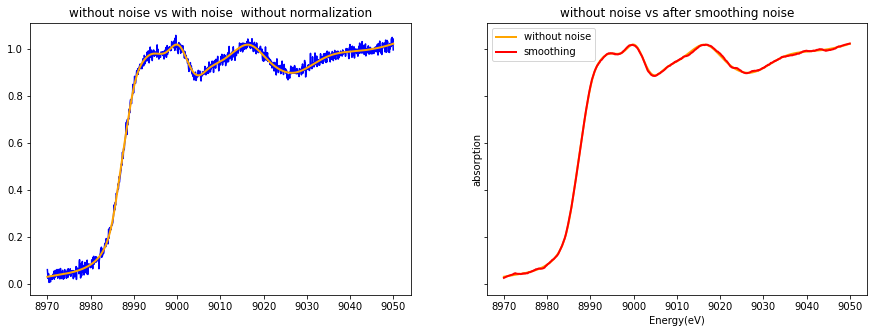

In [38]:
xs = np.linspace(8970, 9050, 1000)
energies = np.linspace(8970, 9050, 100)
s1 = UnivariateSpline(energies, features[0], s=0)
y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
noise = np.random.normal(0,0.015,1000)
y2= y1+ noise
ysmooth = savgol_filter(y2, 51, 2)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), sharex = True, sharey = True)
ax1.plot(xs,y2,color = 'blue', label='with noise' )#noise
ax1.plot(xs,y1,color = 'orange' ,label='without noise', linewidth=2 )# without noise
ax2.plot(xs,y1,color = 'orange', label='without noise', linewidth=2)# without noise
ax2.plot(xs,ysmooth, color='red',label='smoothing', linewidth=2)#smooth
ax1.set_title('without noise vs with noise  without normalization')
ax2.set_title('without noise vs after smoothing noise')
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()

In [16]:
ysmooth.shape

(1000,)

The above spectrum is a example with noise 

## 1. create noise for all the 10000 sample
## 2. use specta with noise to get the 1 & 2 derivate 
## 3. use spectra with all energy-mu points 
## 4. use 1&2 derivate to predict CN 


In [42]:
def GPR_get_CN(features, labels):
    #parameter: features, labels
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    # Import the model we are using
    import sklearn.gaussian_process as gp
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    gpr = model.fit(train_features, train_labels)
    params = model.kernel_.get_params()
    pred_labels, std = model.predict(test_features, return_std=True)
    MSE = ((pred_labels-test_labels)**2).mean()
    print(MSE)
    from sklearn.metrics import r2_score
    print('R Squared Error:', r2_score(test_labels, pred_labels))

In [43]:
def add_noise_to_averaged_spectra_df_return_smooth(df):
    '''
    pre: df should have columns named "Mu1" to "Mu100"
    add noise to the spectra, np.random.normal(0,0.015,1000)
    ysmooth = savgol_filter(y2, 51, 2)
    post:return the np.array, each spectra after smooth mu value; 
    '''
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    smooth=np.array([])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,0.015,1000)
        y2 = y1+ noise
        ysmooth = savgol_filter(y2, 51, 2)
        smooth = np.concatenate((smooth,ysmooth),axis=0)
        
    # return the smooth spectra np.array
    after_smooth=smooth.reshape(len(df.index),1000)
    return after_smooth

In [44]:
#use first 500 data
after_smooth_10000=add_noise_to_averaged_spectra_df_return_smooth(df[:500])

In [45]:
after_smooth_10000.shape

(500, 1000)

In [120]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.021853699555975995
R Squared Error: 0.9091164611297886


In [149]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.0239406342004187
R Squared Error: 0.9361283549574911


In [150]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.0008643381711061786
R Squared Error: 0.9807535684495741


In [151]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125, 2)
0.013432318341193973
R Squared Error: 0.957744008173476


In [46]:
import numpy as np


def xanes_derivatives(mu_df, dx=0.80808080808):
    '''
    This function calculates and returns the first and second derivative of a series of XANES spectra.
    Inputs:
        mu_df = Pandas dataframe of averaged XANES spectra absorption values.
        dx = distance between uniformly distributed energy values in XANES spectra. Defaulted to value provided in data.
    '''
    for nums in range(len(mu_df)):
        if nums == 0:
            pass

    dmu1 = np.zeros([len(mu_df), len(mu_df.columns)])
    dmu2 = np.zeros([len(mu_df), len(mu_df.columns)])

    for i in range(len(mu_df)):
        for j in range(len(mu_df.columns)):
            if j == len(mu_df.columns)-1:
                pass
            else:
                dmu1[i, j] = (mu_df.iloc[i, j+1] - mu_df.iloc[i, j]) / dx

    for i_ in range(len(mu_df)):
        for j_ in range(len(mu_df.columns)):
            if j_ == len(mu_df.columns)-1:
                pass
            else:
                dmu2[i_, j_] = (dmu1[i_, j_+1] - dmu1[i_, j_]) / dx

    return dmu1, dmu2

In [47]:
after_smooth_first500=pd.DataFrame(after_smooth_10000)
after_smooth_first500

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.031924,0.031890,0.031866,0.031853,0.031850,0.031857,0.031874,0.031902,0.031940,0.031988,...,1.018838,1.019046,1.019245,1.019435,1.019615,1.019786,1.019948,1.020100,1.020243,1.020377
1,0.029362,0.030181,0.030969,0.031723,0.032446,0.033135,0.033793,0.034418,0.035010,0.035570,...,1.012505,1.013167,1.013866,1.014599,1.015369,1.016174,1.017015,1.017891,1.018803,1.019750
2,0.028678,0.029453,0.030203,0.030928,0.031628,0.032304,0.032956,0.033583,0.034185,0.034762,...,1.028529,1.029050,1.029579,1.030116,1.030661,1.031214,1.031776,1.032345,1.032923,1.033508
3,0.033795,0.033946,0.034098,0.034251,0.034406,0.034562,0.034719,0.034878,0.035037,0.035198,...,1.020680,1.020977,1.021278,1.021582,1.021890,1.022202,1.022518,1.022838,1.023162,1.023489
4,0.035276,0.035081,0.034907,0.034755,0.034624,0.034515,0.034428,0.034362,0.034318,0.034295,...,1.018343,1.018586,1.018816,1.019033,1.019237,1.019428,1.019606,1.019771,1.019922,1.020061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.026178,0.026270,0.026379,0.026506,0.026650,0.026811,0.026989,0.027184,0.027396,0.027626,...,1.011755,1.012153,1.012562,1.012983,1.013416,1.013861,1.014318,1.014786,1.015266,1.015759
496,0.028482,0.029125,0.029746,0.030347,0.030925,0.031482,0.032017,0.032531,0.033023,0.033494,...,1.006731,1.006902,1.007073,1.007243,1.007413,1.007582,1.007751,1.007920,1.008088,1.008255
497,0.036576,0.036341,0.036127,0.035936,0.035766,0.035619,0.035493,0.035389,0.035307,0.035247,...,1.009609,1.009369,1.009121,1.008866,1.008603,1.008333,1.008056,1.007771,1.007479,1.007179
498,0.029712,0.030046,0.030380,0.030711,0.031041,0.031370,0.031697,0.032023,0.032347,0.032670,...,1.018946,1.018876,1.018787,1.018678,1.018551,1.018405,1.018239,1.018055,1.017851,1.017629


In [48]:
dmu1, dmu2 =xanes_derivatives(after_smooth_first500)
dmu1.shape

(500, 1000)

In [49]:
#use 1&2 derivate to predict CN
dmu_both = np.concatenate((dmu1,dmu2),axis=1)

In [134]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125,)
0.14471298160669677
R Squared Error: 0.3981784248845902


In [146]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125,)
0.141064198563066
R Squared Error: 0.623652308314014


In [147]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125,)
0.013415536759821784
R Squared Error: 0.7012729292868239


In [148]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125, 2)
0.07801983373326585
R Squared Error: 0.7353049230891071


In [135]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.11216493130390823
R Squared Error: 0.5335368335268549


In [139]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.10369817548432449
R Squared Error: 0.7233417878305524


In [141]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125, 2)
0.0579938678257747
R Squared Error: 0.8183303836357352


In [142]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.005738631097417027
R Squared Error: 0.8722164838928368


In [136]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.2406155518431848
R Squared Error: -0.0006540449915510838


In [143]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.37498137385742747
R Squared Error: -0.00041949632875892817


In [144]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.04490900917251888
R Squared Error: 8.080669466892232e-11


In [145]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125, 2)
0.20994519151766305
R Squared Error: -0.00020974818387231586


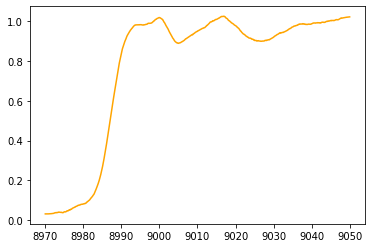

In [50]:
plt.plot(xs,after_smooth_10000[0],color = 'orange')

Text(0.5, 1.0, 'first derivate after smoothing original spectra')

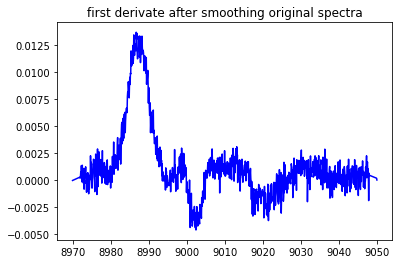

In [52]:
plt.plot(xs,dmu1[0],color = 'blue')
plt.title('first derivate after smoothing original spectra')

In [167]:
dmu1_withoutNoise, dmu2_withoutNoise =xanes_derivatives(df[:500].loc[:,'Mu1':'Mu100'])

In [168]:
dmu1_withoutNoise[0].shape

(100,)

(0.1, 0.125)

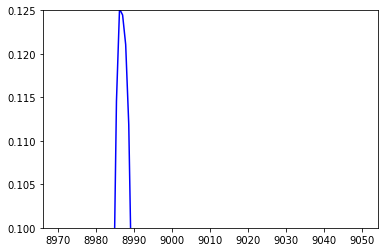

In [176]:
plt.plot(np.linspace(8970, 9050, 100),dmu1_withoutNoise[0],color = 'blue')
plt.ylim((0.1,0.125))

In [174]:
dmu1_Noise, dmu2_Noise =xanes_derivatives(pd.DataFrame(after_smooth_10000[300]))

(0.8, 1.0)

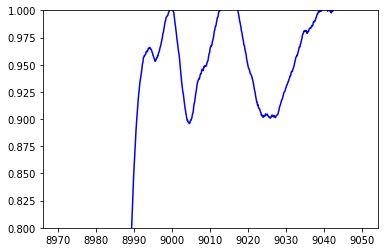

In [183]:
plt.plot(np.linspace(8970, 9050, 1000),after_smooth_10000[300],color = 'blue')
plt.ylim((0.8,1))

In [53]:
def normalization_spectra(df):
    '''
    use a raw spectra as parameter and return the after normalization spectra(np.array)
    all of the data are dividede by the highest absorption
    reurn 100 data point
    '''
    features=np.array(df.loc[:,'Mu1':'Mu100'])
    normalization_features = np.array([[0.0]*(np.size(features, 1))]*(np.size(features, 0)))
    for i in range(len(features)):
        max_absorption = np.amax(features[i])
        j = 0
        for absorption in features[i]:
            normlization_absoprtion = absorption/max_absorption
            normalization_features[i][j]=normlization_absoprtion
            j=j+1
    return normalization_features

In [54]:
normalization_spectra_first_500 = normalization_spectra(df[:500])

Text(0.5, 1.0, 'after normalize without noise')

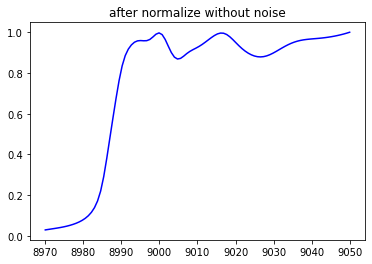

In [56]:
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue')
plt.title('after normalize without noise')

In [57]:
normalization_spectra_first_500_df = pd.DataFrame(normalization_spectra_first_500)
normalization_spectra_first_500_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.029621,0.032019,0.034321,0.036631,0.039058,0.041707,0.044684,0.048098,0.052053,0.056664,...,0.971728,0.973524,0.975609,0.978004,0.980729,0.983803,0.987247,0.991081,0.995325,1.000000
1,0.030940,0.033516,0.035986,0.038471,0.041093,0.043973,0.047232,0.050993,0.055375,0.060515,...,0.980591,0.982233,0.984039,0.985992,0.988080,0.990286,0.992596,0.994995,0.997468,1.000000
2,0.029659,0.032103,0.034441,0.036785,0.039243,0.041927,0.044946,0.048411,0.052431,0.057124,...,0.965007,0.967692,0.970647,0.973884,0.977417,0.981259,0.985425,0.989928,0.994782,1.000000
3,0.030048,0.032515,0.034882,0.037262,0.039767,0.042510,0.045603,0.049159,0.053290,0.058120,...,0.972565,0.974765,0.977160,0.979758,0.982565,0.985589,0.988837,0.992317,0.996035,1.000000
4,0.030502,0.033058,0.035501,0.037950,0.040523,0.043339,0.046516,0.050173,0.054428,0.059412,...,0.979991,0.981523,0.983262,0.985194,0.987304,0.989577,0.991999,0.994553,0.997225,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.030225,0.032690,0.035056,0.037436,0.039942,0.042687,0.045783,0.049342,0.053477,0.058311,...,0.982823,0.983906,0.985131,0.986526,0.988119,0.989937,0.992006,0.994355,0.997011,1.000000
496,0.030376,0.032862,0.035246,0.037641,0.040160,0.042916,0.046023,0.049595,0.053743,0.058591,...,0.998807,0.998323,0.997905,0.997587,0.997406,0.997398,0.997598,0.998042,0.998766,0.999806
497,0.030565,0.033099,0.035527,0.037965,0.040532,0.043345,0.046523,0.050183,0.054442,0.059432,...,0.982776,0.983944,0.985273,0.986774,0.988457,0.990334,0.992416,0.994714,0.997238,1.000000
498,0.029926,0.032374,0.034722,0.037079,0.039557,0.042266,0.045317,0.048820,0.052887,0.057636,...,0.978172,0.979613,0.981265,0.983145,0.985266,0.987643,0.990290,0.993222,0.996454,1.000000


In [58]:
after_normalize_add_noise_smooth1000=add_noise_to_averaged_spectra_df_return_smooth(normalization_spectra_first_500_df)

In [60]:
after_normalize_add_noise_smooth1000

array([[0.03089033, 0.03061724, 0.03036556, ..., 0.99936283, 1.00005989,
        1.00077016],
       [0.04507573, 0.04350398, 0.04200643, ..., 1.00417616, 1.00431743,
        1.00444824],
       [0.03072809, 0.03086649, 0.03100775, ..., 0.99760949, 0.99801921,
        0.99842783],
       ...,
       [0.0294274 , 0.02980572, 0.03017999, ..., 0.99851088, 0.9991469 ,
        0.99980456],
       [0.0257762 , 0.02610646, 0.02643551, ..., 1.00859076, 1.00996962,
        1.01138908],
       [0.02799967, 0.02800431, 0.02802452, ..., 1.01074321, 1.01235158,
        1.01400602]])

0.9999216462151767


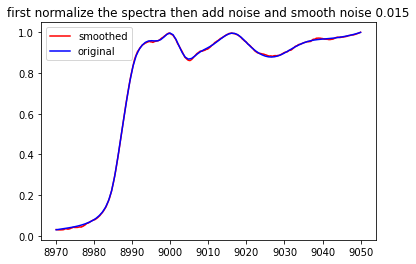

In [86]:
plt.plot(np.linspace(8970, 9050, 1000),after_normalize_add_noise_smooth1000[0],color = 'red',label = 'smoothed')
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue', label = 'original')
print(r2_score(normalization_spectra_first_500[0], one_demension_get_N_evenly_spaced_elements(after_normalize_add_noise_smooth1000[0],100)))
plt.title('first normalize the spectra then add noise and smooth noise 0.015')
plt.legend()
plt.show()
# but this r quare just pick points to calculate by 10 steps

In [80]:
def smooth_spectra(ndarray,windowSize=51, polynomial=2, datapoints=1000):
    smooth=np.array([])
    xs = np.linspace(8970, 9050, datapoints)
    energies= np.linspace(8970, 9050, len(ndarray[0]))
    for i in range(len(ndarray)):
        y2 = ndarray[i]
        s1 = UnivariateSpline(energies, y2, s=0)
        after_smooth_contiuous_y = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter        
        ysmooth = savgol_filter(after_smooth_contiuous_y, windowSize, polynomial)
        smooth = np.concatenate((smooth,ysmooth),axis=0)
    after_smooth=smooth.reshape(len(ndarray),datapoints)
    return after_smooth

In [81]:
def add_noise(df,std=0.015):
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    y_noise=np.array([])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,std,1000)
        y2 = y1+ noise
        y_noise = np.concatenate((y_noise,y2),axis=0)
    return y_noise.reshape(len(df.index),1000)

In [71]:
def one_demension_get_N_evenly_spaced_elements(arr, numElems):
    '''
    return nd.array
    '''
    idx = np.round(np.linspace(0, len(arr) - 1, numElems)).astype(int)
    return arr[idx]

In [72]:
def ndArray_get_N_evely_spaced_elements(after_smooth, numElems):
    ndArray_evenly_spaced=np.array([])
    for arr in after_smooth:
        a_row_evenly_spaced=one_demension_get_N_evenly_spaced_elements(arr, numElems)
        print(a_row_evenly_spaced)
        #ndArray_evenly_spaced=np.concatenate((ndArray_evenly_spaced, [a_row_evenly_spaced]),axis=0)
        ndArray_evenly_spaced  = np.append(ndArray_evenly_spaced, a_row_evenly_spaced, axis=0)
    return ndArray_evenly_spaced.reshape(len(after_smooth),numElems)

In [295]:
ndArray_100_evely_spaced_elements=ndArray_get_N_evely_spaced_elements(after_normalize_add_noise_smooth, 100)

[0.03273185 0.03464848 0.03601004 0.03558232 0.03682698 0.03880852
 0.04354677 0.0447175  0.05056924 0.05607908 0.06437752 0.0706345
 0.07513019 0.08447259 0.09912686 0.11433858 0.13745893 0.16989239
 0.21606424 0.28818039 0.37839628 0.47698496 0.57421449 0.67043582
 0.75913127 0.8314669  0.88667184 0.91762809 0.93620774 0.94551346
 0.95439469 0.95613041 0.95513896 0.96129992 0.96783342 0.97700696
 0.9870182  0.992486   0.98831312 0.96338688 0.93324741 0.89747673
 0.87635583 0.86913119 0.87521703 0.88358093 0.89222156 0.90595221
 0.92337887 0.92655007 0.93198356 0.94181117 0.95162419 0.96123001
 0.96961779 0.98227628 0.99402099 0.99730369 0.99671447 0.9861355
 0.97627296 0.96125715 0.94680687 0.93108033 0.91783344 0.9037327
 0.89268034 0.88461532 0.88048024 0.88193096 0.87754703 0.88144969
 0.88564633 0.89583502 0.90256689 0.91286413 0.91805525 0.92625638
 0.93279377 0.94004439 0.94337244 0.94936912 0.95461665 0.96171594
 0.96382882 0.96728251 0.96337267 0.96367711 0.96967528 0.9770117

[0.02442831 0.03000267 0.03443394 0.03685768 0.03827649 0.04432445
 0.04264792 0.04653794 0.05266348 0.06168739 0.06543716 0.0676422
 0.07165013 0.08042001 0.09622906 0.11666843 0.14329304 0.1795452
 0.23177539 0.30176879 0.38887682 0.48684399 0.58380799 0.68152552
 0.76837843 0.83766946 0.88517008 0.9139229  0.93521301 0.93820785
 0.944783   0.95143958 0.95219584 0.95206606 0.95770325 0.96844591
 0.98667968 0.99574849 0.98990964 0.96241655 0.93314183 0.9083754
 0.88767489 0.87888367 0.8803552  0.88634297 0.90397097 0.91298513
 0.92258557 0.92953412 0.94084477 0.94877695 0.95737371 0.96734415
 0.9750854  0.98079177 0.99397877 0.99467559 0.99239355 0.98347429
 0.97521314 0.96216879 0.94592482 0.93407101 0.92455437 0.91345449
 0.90215974 0.89330466 0.88823422 0.88505331 0.87974739 0.88198516
 0.89288628 0.90158041 0.90454369 0.91266477 0.92317253 0.93267072
 0.94320949 0.95141699 0.95673006 0.96046144 0.9629993  0.96695314
 0.96995477 0.96977136 0.97080272 0.97170362 0.97306999 0.9754119

[0.0348476  0.03346222 0.03305133 0.03077858 0.03425342 0.04246388
 0.04794457 0.04876107 0.05071766 0.05332076 0.06090824 0.07269616
 0.08581758 0.09548398 0.10207728 0.11860455 0.14323702 0.18178328
 0.23679142 0.3159551  0.41154353 0.51088097 0.60999799 0.703848
 0.78826413 0.85255708 0.89613882 0.9215677  0.9331688  0.94197159
 0.94466108 0.94339484 0.94436262 0.95304594 0.96440742 0.97715977
 0.98542876 0.98318823 0.96627762 0.93833575 0.90980603 0.88604368
 0.87555929 0.8746675  0.8779893  0.88442168 0.89353657 0.90842833
 0.92296959 0.93187501 0.93571048 0.94428172 0.95481743 0.9686014
 0.97677015 0.98236319 0.98837608 0.98931583 0.98284888 0.9718223
 0.96000616 0.949643   0.93376655 0.91780082 0.90236125 0.89011186
 0.8829074  0.87819252 0.88144222 0.87801716 0.87327004 0.8808496
 0.89011301 0.89667262 0.89837773 0.90884653 0.91466777 0.92168794
 0.93047606 0.93753601 0.94488928 0.94731864 0.95412379 0.9545625
 0.95438949 0.95628437 0.95755841 0.96258458 0.96976372 0.97506328
 

 0.99692334 0.9971458  0.99437571 0.98753863]
[0.03009235 0.03186834 0.03488828 0.04067266 0.04557882 0.04165732
 0.04232043 0.04588561 0.05628694 0.05889132 0.06186003 0.06775518
 0.07520644 0.08354955 0.10167359 0.12512335 0.15214347 0.19497961
 0.24767899 0.32040382 0.41511893 0.52127839 0.62320935 0.71241527
 0.78979063 0.85103281 0.8977802  0.92417869 0.93264765 0.93433322
 0.93736747 0.93680496 0.94115365 0.94612056 0.94924452 0.95819496
 0.96603176 0.97494376 0.96924167 0.95371516 0.93067556 0.91359996
 0.90083313 0.89642768 0.9036659  0.92008475 0.93604175 0.94672929
 0.9537432  0.95580603 0.96449853 0.97208694 0.97172991 0.97099732
 0.97108991 0.9769337  0.97893729 0.9758951  0.97038212 0.96129792
 0.95391868 0.94596638 0.9315226  0.91851565 0.91054993 0.89909458
 0.89454608 0.89160929 0.89588216 0.89960164 0.89296794 0.89215816
 0.89478104 0.90442932 0.91552672 0.92525487 0.93597874 0.94632563
 0.9594964  0.96885847 0.97682614 0.98091781 0.98904668 0.99512259
 1.0017009  1.00

In [296]:
ndArray_100_evely_spaced_elements.shape

(500, 100)

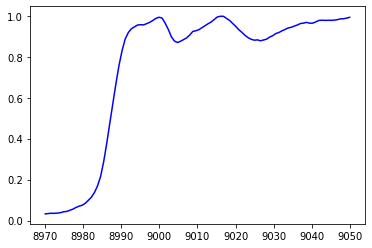

In [297]:
plt.plot(np.linspace(8970, 9050, 100),ndArray_100_evely_spaced_elements[0],color = 'blue')

In [300]:
dmu1_ndArray_100_evely_spaced_elements , dmu2_ndArray_100_evely_spaced_elements = xanes_derivatives(pd.DataFrame(ndArray_100_evely_spaced_elements))

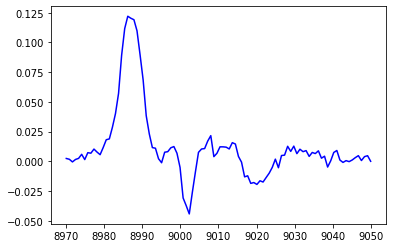

In [301]:
#only choose 100 points to get the derivative
plt.plot(np.linspace(8970, 9050, 100),dmu1_ndArray_100_evely_spaced_elements[0],color = 'blue')

In [345]:
import sys
sys.path.append('../PredictXANES')
import normalize_noise_smooth_evenly_select_data
from scipy.signal import savgol_filter

In [362]:
smooth_first_derivative=smooth_spectra(dmu1_ndArray_100_evely_spaced_elements)

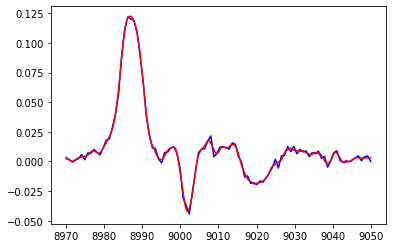

In [363]:
plt.plot(np.linspace(8970, 9050, 100),dmu1_ndArray_100_evely_spaced_elements[0],color = 'blue')
plt.plot(np.linspace(8970, 9050, 1000),smooth_first_derivative[0],color = 'red')

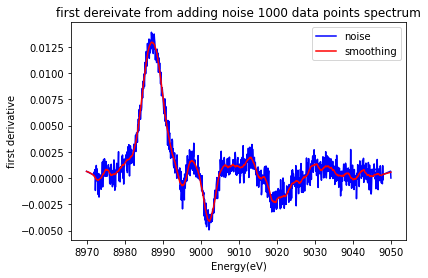

In [370]:
# derivative data with 1000 data point 
# The original spectrum has already been normalized
smoothed_dmu1 = smooth_spectra(dmu1,windowSize=51, polynomial=2, datapoints=1000)
plt.plot(xs,dmu1[0],color = 'blue', label='noise')
plt.plot(xs,smoothed_dmu1[0],color = 'red', label='smoothing')
plt.title('first dereivate from adding noise 1000 data points spectrum')
plt.xlabel('Energy(eV)')
plt.ylabel('first derivative')
plt.legend()
plt.show()

use only the smoothed first derivative data(original spectrum normalized) to predict CN 

In [371]:
GPR_get_CN(features = smoothed_dmu1, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.05538358872388099
R Squared Error: 0.7696748541057793


# We change the std, if we choose a smaller window size the graph will be more zigzag. ???

In [103]:
add_noise_0_05=add_noise(normalization_spectra_first_500_df,std=0.05)
smooth_after_add_noise_0_05 = smooth_spectra(add_noise_0_05, windowSize=99, polynomial=2)

In [133]:
smooth_after_add_noise_0_05_ws_51 = smooth_spectra(add_noise_0_05, windowSize=51, polynomial=2)

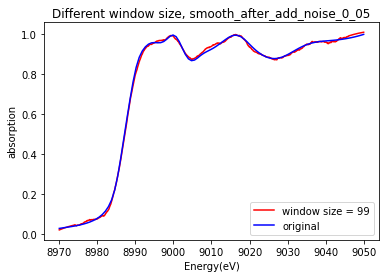

In [136]:
plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05[0],color = 'red',label = 'window size = 99')
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue', label = 'original')
#plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05_ws_51[0],color = 'orange',label = 'window size = 51')
plt.title('Different window size, smooth_after_add_noise_0_05')
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()

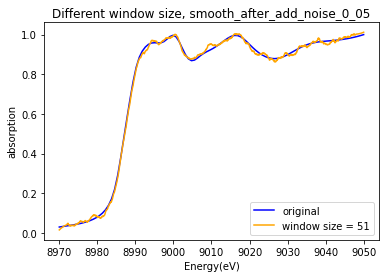

In [137]:
#plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05[0],color = 'red',label = 'window size = 99')
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue', label = 'original')
plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05_ws_51[0],color = 'orange',label = 'window size = 51')
plt.title('Different window size, smooth_after_add_noise_0_05')
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()

In [108]:
print('std=0.05, R Squared Error between original & smooth:',
      r2_score(one_demension_get_N_evenly_spaced_elements(smooth_after_add_noise_0_05[0],100), normalization_spectra_first_500[0]))

std=0.05, R Squared Error between original & smooth: 0.999373203571253


In [111]:
#get the dmu1, dmu2 from the smoothed spectra which std =0.05 noise data
dmu1_0_05,dmu2_0_05 = xanes_derivatives(pd.DataFrame(smooth_after_add_noise_0_05))

In [112]:
# without smooth the first derivative data std=0.05
GPR_get_CN(features = dmu1_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.1376955997321345
R Squared Error: 0.42736179023334175


In [115]:
# smooth the first derivative data std=0.05
smooth_dmu1_0_05 = smooth_spectra(dmu1_0_05, windowSize=99, polynomial=2)
print('std=0.05, R Squared Error between original dmu1 & smoothed dmu1:',
      r2_score(smooth_dmu1_0_05[0], dmu1[0]))

std=0.05, R Squared Error between original dmu1 & smoothed dmu1: 0.9039960506852236


In [116]:
GPR_get_CN(features = smooth_dmu1_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.08774841439915608
R Squared Error: 0.6350784264047253


In [117]:
# if accumulatively do smooth twice on dmu1
twice_smooth_dmu1_0_05 = smooth_spectra(smooth_dmu1_0_05, windowSize=99, polynomial=2)
print('std=0.05, R Squared Error between original dmu1 & smoothed dmu1:',
      r2_score(twice_smooth_dmu1_0_05[0],smooth_dmu1_0_05[0]))

std=0.05, R Squared Error between original dmu1 & smoothed dmu1: 0.9977488521413069


In [118]:
GPR_get_CN(features = twice_smooth_dmu1_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.08482226869457521
R Squared Error: 0.6472474633314481


In [130]:
#original dmu1 without noise 
normalized_without_noise_spectra=normalization_spectra(df[:500].loc[:,'Mu1':'Mu100'])
without_noise_dmu1, without_noise_dmu2 = xanes_derivatives(pd.DataFrame(normalized_without_noise_spectra))

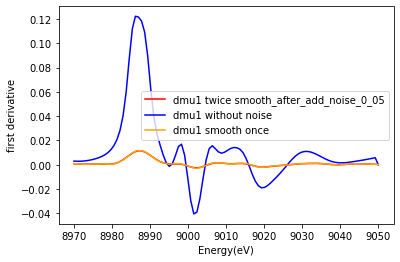

In [131]:
plt.plot(np.linspace(8970, 9050, 1000),twice_smooth_dmu1_0_05[0],color = 'red',label = 'dmu1 twice smooth_after_add_noise_0_05')
plt.plot(np.linspace(8970, 9050, 100),without_noise_dmu1[0],color = 'blue', label = 'dmu1 without noise')
plt.plot(np.linspace(8970, 9050, 1000),smooth_dmu1_0_05[0],color = 'orange',label = 'dmu1 smooth once')
plt.xlabel('Energy(eV)')
plt.ylabel('first derivative')
plt.legend()
plt.show()

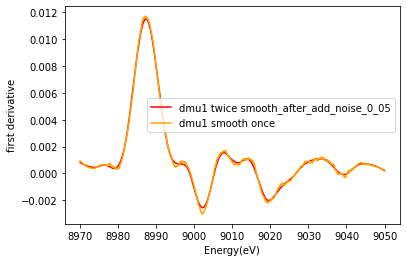

In [132]:
plt.plot(np.linspace(8970, 9050, 1000),twice_smooth_dmu1_0_05[0],color = 'red',label = 'dmu1 twice smooth_after_add_noise_0_05')
plt.plot(np.linspace(8970, 9050, 1000),smooth_dmu1_0_05[0],color = 'orange',label = 'dmu1 smooth once')
plt.xlabel('Energy(eV)')
plt.ylabel('first derivative')
plt.legend()
plt.show()

After smooth dmu2, the R2 improved a lot, but still smaller than 0.5

In [138]:
# only use after smooth dmu2 std = 0.05, windowsize =99 
smooth_dmu2_0_05 = smooth_spectra(dmu2_0_05, windowSize=99, polynomial=2)
GPR_get_CN(features = smooth_dmu2_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.13784193085443
R Squared Error: 0.42675323925518815
